# Data analysis

### Imports

In [1]:
import matplotlib.pyplot as plt 
import os
import numpy as np
import cv2
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from IPython.display import Image  # for displaying images
from PIL import Image, ImageDraw


In [21]:
with open('results/list_objects.txt') as f:
    ff = f.read().splitlines()
    #ff = [it.split(' ') for it in ff]

In [25]:
liste_faune = []
for elt in ff : 
    tmp = elt.split(' ')
    if tmp[1] not in ['1', '4', '5','12', '19', '20'] :
        liste_faune.append(elt)

with open('results/liste_finale.txt', 'w') as f:
    for elt in liste_faune:
        f.write(elt+'\n')

## 1. Visualisation - number of objects per image

### Comparision between all classes and reduced nomenclature 

In [27]:
def count_occ(path): # count the number of object per image 
    with open(path, 'r') as f: 
        x = f.read().splitlines()
        x = [it.split(' ') for it in x]
        x = [it[0] for it in x ]
    tmp = Counter(x)
    tmp = list(tmp.values())
    return Counter(tmp)

In [2]:
def nb_im(path): # count the number of object per image 
    with open(path, 'r') as f: 
        x = f.read().splitlines()
        x = [it.split(' ') for it in x]
        x = [it[0] for it in x ]
    return Counter(x)

In [32]:
a = nb_im("results/liste_finale.txt")
len(a)

348

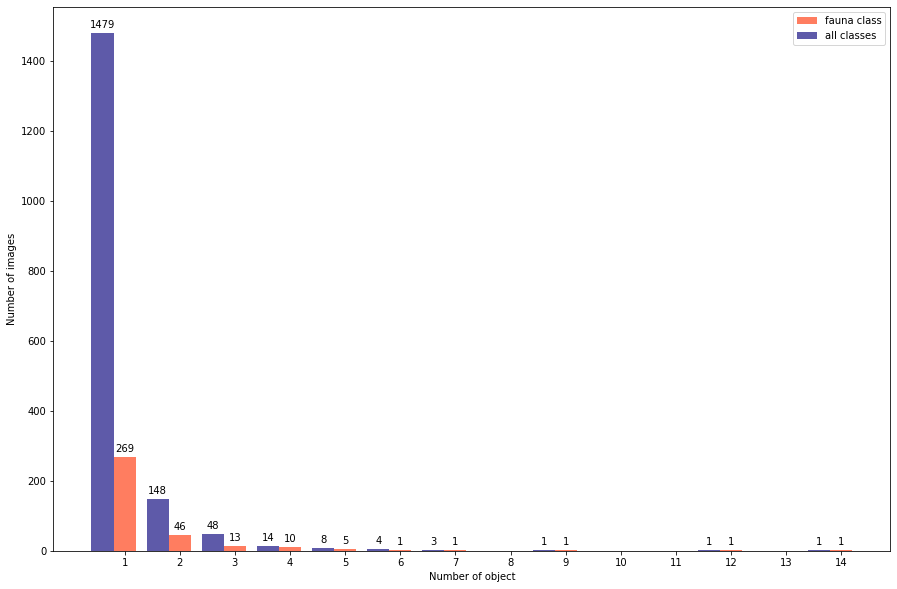

In [28]:
s = count_occ("results/liste_finale.txt")
t = count_occ("results/list_objects.txt")

x = np.arange(1, 15)
num = [int(it) for it in x]

width = 0.4  

fig, ax = plt.subplots(figsize=(15, 10))

rects = ax.bar([it + 0.4 for it in list(s.keys())], list(s.values()), width, label="fauna class", color="#ff7d60")
ax.bar_label(rects, padding=3)
rects = ax.bar(list(t.keys()), list(t.values()), width, label="all classes", color="#5e5aa9")
ax.bar_label(rects, padding=3)

ax.set_ylabel('Number of images')
ax.set_xlabel('Number of object')
ax.set_xticks(x + width, num)
plt.legend()
plt.show()

### Proportion of the empty and non-empty images

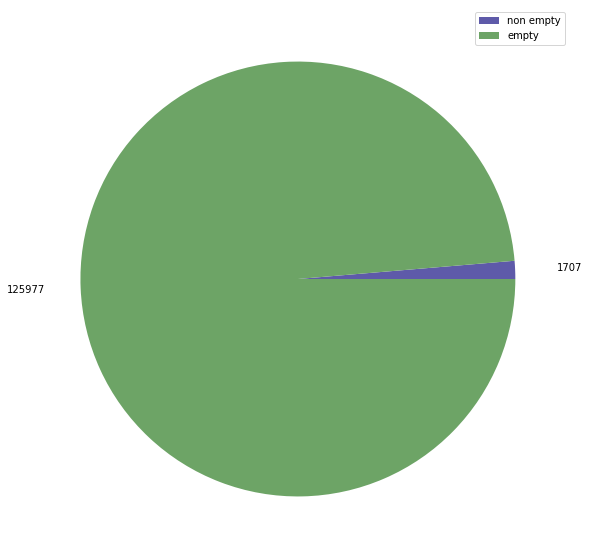

In [34]:
tot_im = sum(list(t.values()))
tot_empty = 125977
plt.figure(figsize=(10, 10))
plt.pie([tot_im, tot_empty], colors=["#5e5aa9", '#6da466'],  autopct=lambda p: '{:.0f}'.format(p*(tot_empty+tot_im)/100), pctdistance=1.25, labeldistance=.6)
plt.legend(["non empty", "empty"])
plt.show()

### Table

In [35]:
nb = np.arange(1, 15)
total = [1479,148,48,14,8,4,3,0, 1, 0, 0, 1, 0, 1]
total_f = [269, 46, 13, 10, 5, 1, 1, 0, 1, 0, 0, 1, 0, 1]
total_perc = [round(it*100/sum(total),2) for it in total]
total_f_perc = [round(it*100/sum(total_f),2) for it in total_f]


In [36]:
df = pd.DataFrame([total, total_perc, total_f, total_f_perc], index=["number of object", "percentage of object", "number of fauna object", "percentage of fauna object"], columns=nb)
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
number of object,1479.00,148.00,48.00,14.00,8.00,4.00,3.00,0.0,1.00,0.0,0.0,1.00,0.0,1.00
percentage of object,86.64,8.67,2.81,0.82,0.47,0.23,0.18,0.0,0.06,0.0,0.0,0.06,0.0,0.06
number of fauna object,269.00,46.00,13.00,10.00,5.00,1.00,1.00,0.0,1.00,0.0,0.0,1.00,0.0,1.00
percentage of fauna object,77.30,13.22,3.74,2.87,1.44,0.29,0.29,0.0,0.29,0.0,0.0,0.29,0.0,0.29


## 2. Classes and their distribution

In [44]:
colors_c = ["#ffc65e","#ff7d60","#ff7d60","#ffc65e","#ffc65e","#ff7d60","#ff7d60","#ff7d60","#ff7d60","#ff7d60","#ff7d60","#ffc65e","#ff7d60","#ff7d60","#ff7d60","#ff7d60","#ff7d60","#ff7d60","#ffc65e","#ffc65e"]
classes = ["Algue","Dauphin_BleuBlanc","Dauphin_Commun","Déchet","Poisson","Fou_Bassan_Pose","Fou_Bassan_Vol","Goeland_Pose","Goeland_Vol","Grand_Dauphin","Marsouin","Meduse","Petit_Puffin_Pose","Petit_Puffin_Vol","Requin","Sterne_Pose","Sterne_Vol","Delphinid_Ind.","Bateau","Inconnu"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


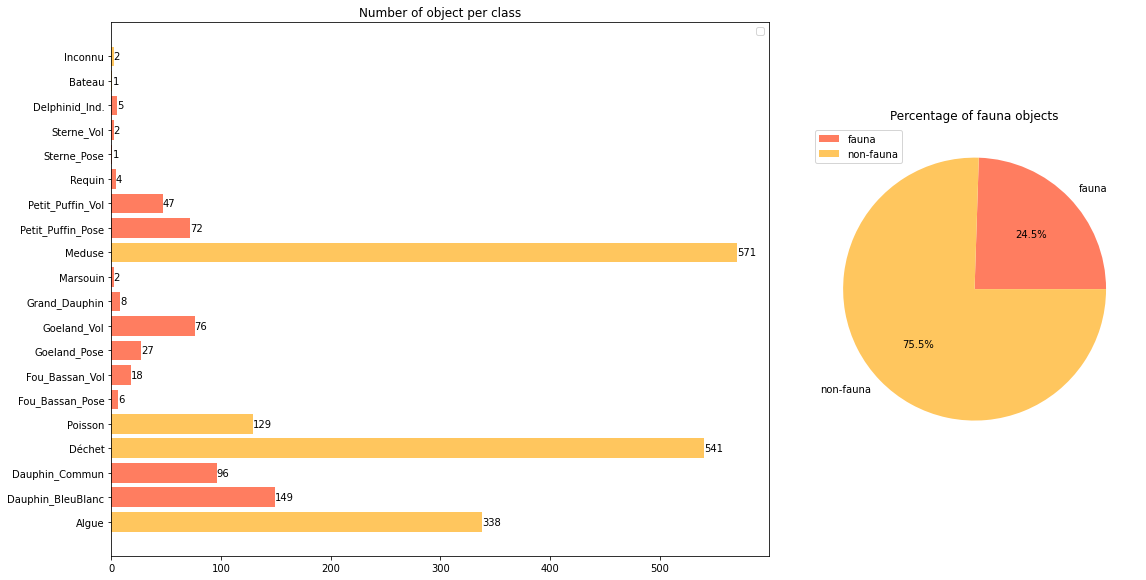

In [45]:
with open('results/list_objects.txt', 'r') as f: 
    list_class = f.read().splitlines()
    list_class = [it.split(" ") for it in list_class]
    list_class = [int(it[1]) for it in list_class]

dist_class = [0]*20

for i in list_class: 
    dist_class[i-1] += 1 

non_f = dist_class[0]+dist_class[3]+dist_class[18]+dist_class[19]+dist_class[4]+dist_class[11]
fauna = [sum(dist_class) - non_f, non_f]

fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]}, figsize=(15,8))
fig.tight_layout()
p = ax[0].barh(np.arange(20), dist_class, tick_label=classes, color=colors_c)
ax[0].bar_label(p)
ax[0].set_title('Number of object per class')
ax[0].legend()
ax[1].pie(fauna, labels=['fauna', 'non-fauna'], autopct='%1.1f%%', colors=["#ff7d60", "#ffc65e"])
ax[1].set_title('Percentage of fauna objects')
ax[1].legend()
plt.show()

## 3. Bounding boxes and their surfaces

### Boxplot of the fauna's bounding boxes surface

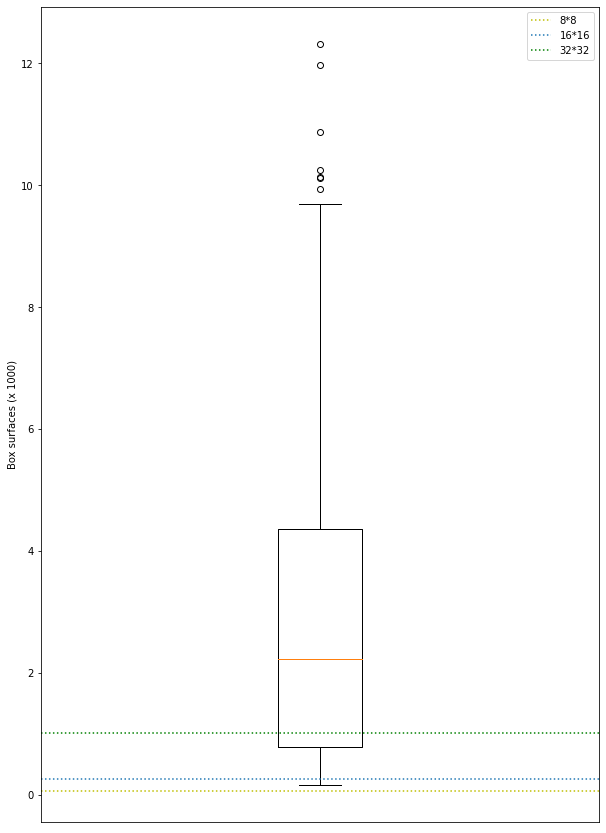

In [2]:
with open("results/liste_finale.txt", 'r') as f:
    s_ani = f.read().splitlines()
    s_ani = [it.split(' ') for it in s_ani]
    hw_ani = s_ani
    s_ani = [(float(it[4])*416*float(it[5])*416)/1000 for it in s_ani]

plt.figure(figsize=(10,15))
plt.boxplot(s_ani)
plt.axhline((8*8)/1000, linestyle=":", label="8*8", color="y")
plt.axhline((16*16)/1000, linestyle=":", label="16*16")
plt.axhline((32*32)/1000, linestyle=":", label="32*32", color="g")
plt.ylabel("Box surfaces (x 1000)")
plt.xticks([])
plt.legend()
plt.show()

### Mean width and mean height

In [2]:
with open('results/liste_finale.txt', 'r') as f:
    liste = f.read().splitlines()
    liste = [it.split(" ") for it in liste]
    liste = [ [float(it[4])*416, float(it[5])*416] for it in liste]

In [3]:
w = 0
h = 0
size = len(liste)
for it in range(size):
    w += liste[it][0]
    h += liste[it][1]

print("The mean width and height of a bounding box are : (", round(w/size, 3),",", round(h/size, 3), ")")

The mean width and height of a bounding box are : ( 49.12 , 52.789 )


### Calculate width and heigth of the anchors

Determine 3 anchors with k-means method. 

In [4]:
X = np.array(liste)

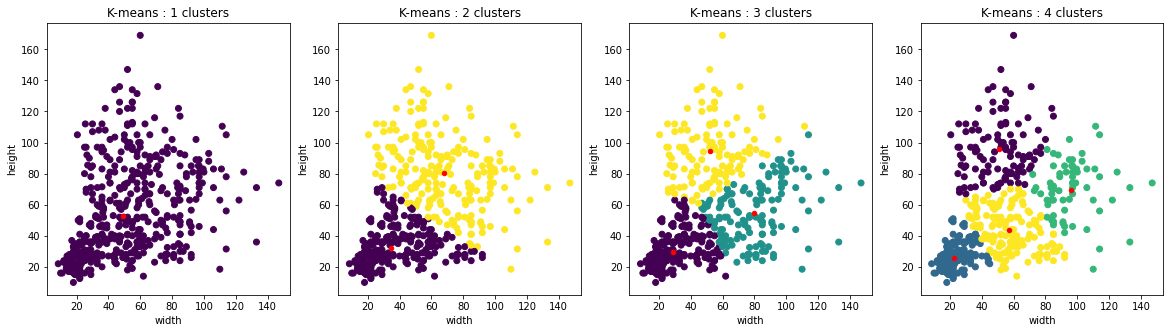

In [7]:
# Make subplots for each variant
n_clusters_list = [1,2,3,4]
fig, axs = plt.subplots(
    1, len(n_clusters_list), figsize=(20, 5)
)

axs = axs.T
for j, n_clusters in enumerate(n_clusters_list):
    algo =  KMeans(n_clusters=n_clusters)
    algo.fit(X)
    centers = algo.cluster_centers_

    axs[j].scatter(X[:, 0], X[:, 1], c=algo.labels_)
    axs[j].scatter(centers[:, 0], centers[:, 1], c="r", s=20)
    axs[j].set_xlabel("width")
    axs[j].set_ylabel("height")
    axs[j].set_title("K-means : "+str(n_clusters)+" clusters")
plt.show()

## 4. Visualisation of the bounding box 

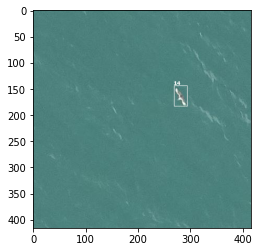

In [22]:
def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        plotted_image.text((x0, y0 - 10), str(int(ann[0])))
    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file 
annotation_file = "data/non_empty/200521_133_21619_3.txt"
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

for i in annotation_list:
    i[0] = int(i[0])
    i.remove(i[5])

#Get the corresponding image file
image_file = annotation_file.replace("txt", "jpg")

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)



In [8]:
with open('results/list_objects.txt') as f:
    l = f.read().splitlines()
    l = [ it.split(' ') for it in l]

fau = [0]*20
for it in l:
    fau[int(it[1])-1] += 1
    #if int(it[1]) in [2,3,6,7,8,9,10,11,13,14,15,16,17,18]:
    #if it[1] in ['1', '2', '5', '6','7','8','9','10','12', '13','14','17'] : 
    #    fau.append(it)

fau

[338, 149, 96, 541, 129, 6, 18, 27, 76, 8, 2, 571, 72, 47, 4, 1, 2, 5, 1, 2]